<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa2_MLP_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2 - Perceptron Multi-camada [Solução]

Nesta tarefa, você vai propor topologias de redes neurais multi-camada que vão resolver problemas de classificação binária com distribuições não separáveis linearmente (semi-luas e círculos).

As distribuições estão plotadas para visualização (vermelho e azul representam as diferentes classes).

O objetivo é obter uma rede que tenha 100% de acurácia de treinamento e validação em até 1000 épocas de treinamento.

Sugestão: Aumente progressivamente o número de camadas (inicie com 2 camadas) e avalie a melhoria das acurácias.


## Geração dos datasets

In [1]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)


## 1. Meia-lua

In [2]:
data = noisy_moons[0]
label = noisy_moons[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

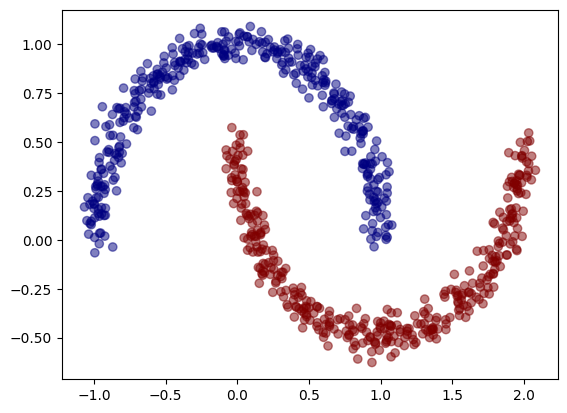

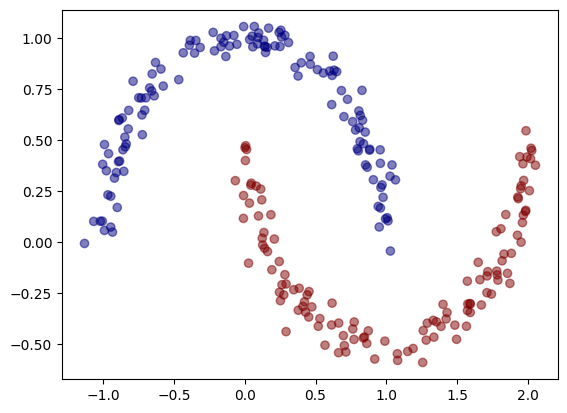

In [3]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

In [4]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[2]),
                              tf.keras.layers.Dense(1, activation=tf.nn.relu)])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5571 - loss: 0.3154 - val_accuracy: 0.7440 - val_loss: 0.1487
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.1637 - val_accuracy: 0.7880 - val_loss: 0.1252
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7731 - loss: 0.1315 - val_accuracy: 0.8080 - val_loss: 0.1149
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7994 - loss: 0.1151 - val_accuracy: 0.8320 - val_loss: 0.1070
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7885 - loss: 0.1215 - val_accuracy: 0.8400 - val_loss: 0.1007
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8193 - loss: 0.1110 - val_accuracy: 0.8480 - val_loss: 0.0955
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8232 - loss: 0.1085 - val_accuracy: 0.8560 - val_loss: 0.0912
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.1023 - val_accuracy: 0.8640 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.02 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

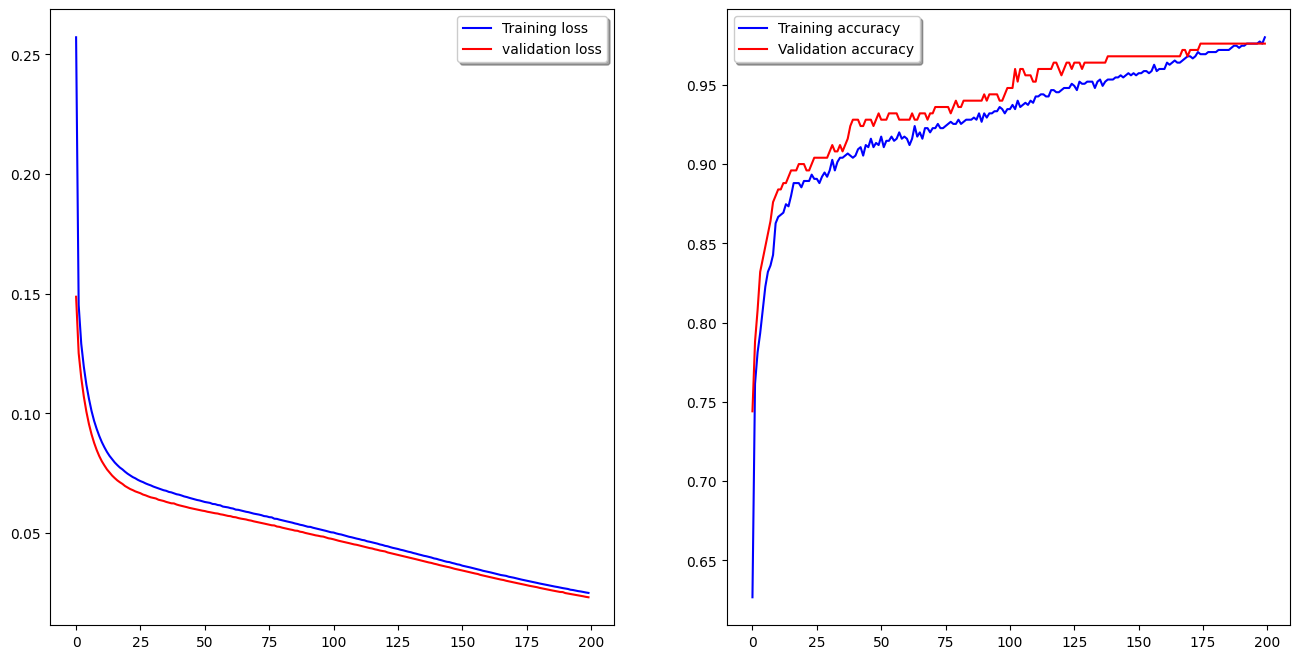

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


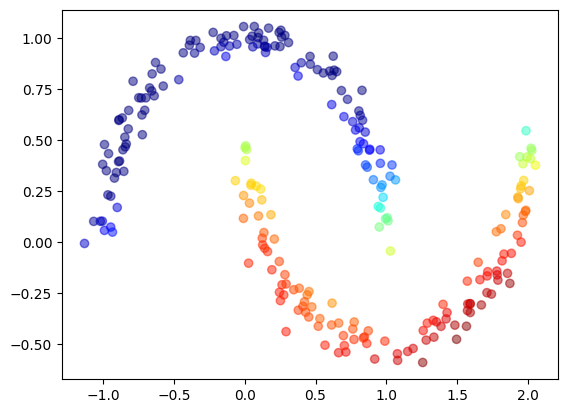

In [7]:
Y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=Y_predict , alpha=0.5, cmap='jet')
plt.show()

## 2. Círculos

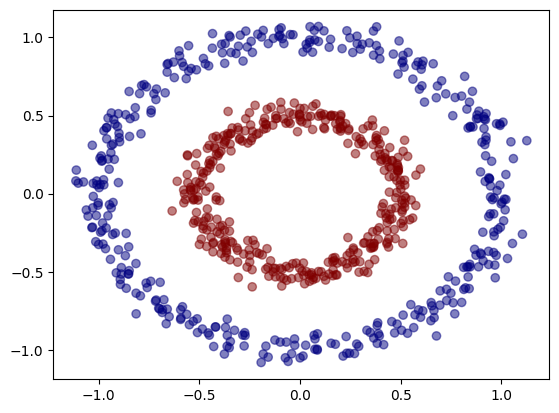

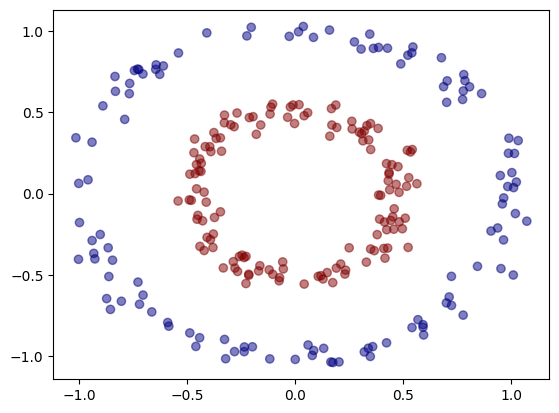

In [8]:
data = noisy_circles[0]
label = noisy_circles[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[2]),
                              tf.keras.layers.Dense(1, activation=tf.nn.relu)])


model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

model.summary()

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5156 - loss: 0.4348 - val_accuracy: 0.4680 - val_loss: 0.3506
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5290 - loss: 0.3011 - val_accuracy: 0.4160 - val_loss: 0.2818
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4120 - loss: 0.2654 - val_accuracy: 0.3680 - val_loss: 0.2603
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4284 - loss: 0.2532 - val_accuracy: 0.4520 - val_loss: 0.2491
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4939 - loss: 0.2403 - val_accuracy: 0.6680 - val_loss: 0.2395
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6694 - loss: 0.2358 - val_accuracy: 0.7040 - val_loss: 0.2324
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6697 - loss: 0.2288 - val_accuracy: 0.7520 - val_loss: 0.2255
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7424 - loss: 0.2229 - val_accuracy: 0.8040 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.02 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


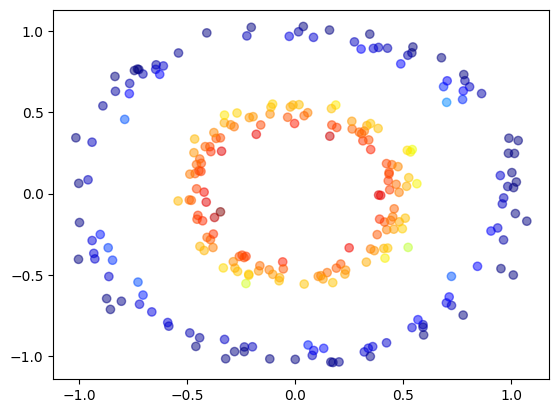

In [10]:
Y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=Y_predict , alpha=0.5, cmap='jet')
plt.show()

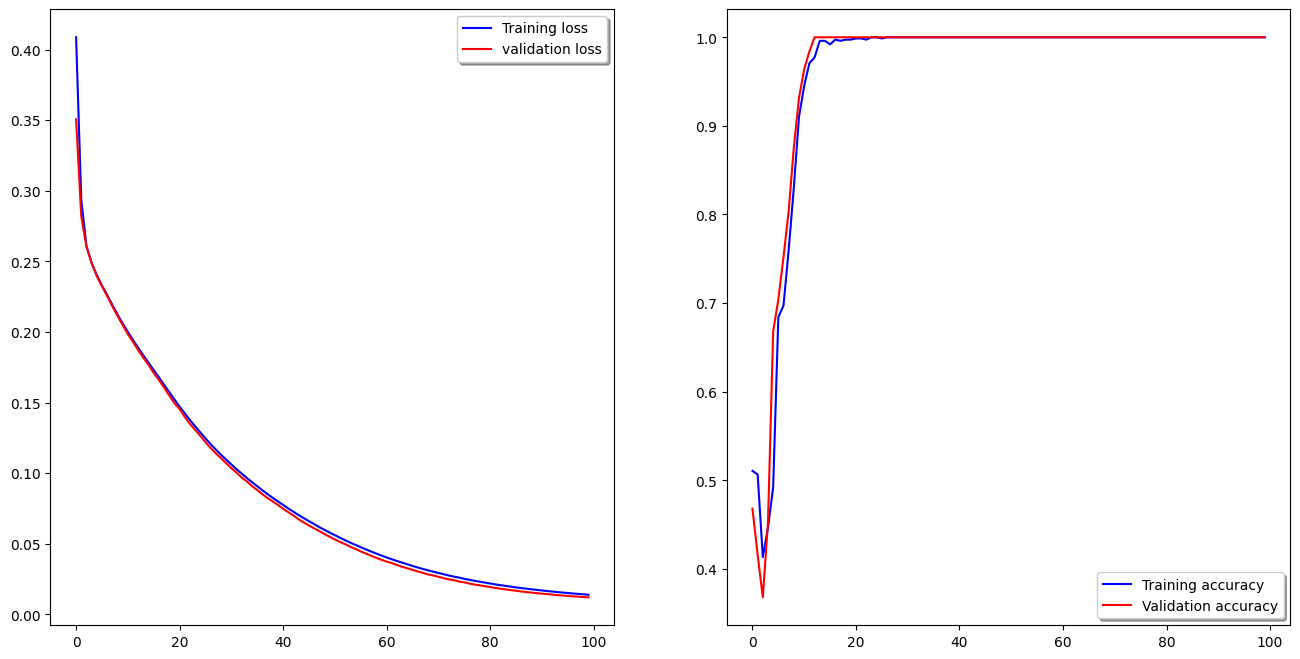

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)